In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define the universe of discourse (input range)
x = np.linspace(0, 100, 500)

# Define common membership functions
triangular_mf = fuzz.trimf(x, [20, 50, 80])  # Triangular
trapezoidal_mf = fuzz.trapmf(x, [10, 30, 70, 90])  # Trapezoidal
gaussian_mf = fuzz.gaussmf(x, 50, 10)  # Gaussian
gauss2_mf = fuzz.gauss2mf(x, 30, 5, 70, 10)  # Double Gaussian
sigmoid_mf = fuzz.sigmf(x, 50, 5)  # Sigmoidal

# Plotting the membership functions
plt.figure(figsize=(12, 6))

# Triangular Membership Function
plt.plot(x, triangular_mf, label='Triangular MF', color='blue')

# Trapezoidal Membership Function
plt.plot(x, trapezoidal_mf, label='Trapezoidal MF', color='green')

# Gaussian Membership Function
plt.plot(x, gaussian_mf, label='Gaussian MF', color='red')

# Double Gaussian Membership Function
plt.plot(x, gauss2_mf, label='Double Gaussian MF', color='purple')

# Sigmoidal Membership Function
plt.plot(x, sigmoid_mf, label='Sigmoidal MF', color='orange')

# Customize the plot
plt.title('Common Membership Functions using scikit-fuzzy')
plt.xlabel('Universe of Discourse (Input)')
plt.ylabel('Membership Degree')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

ModuleNotFoundError: No module named 'numpy'

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Triangular Membership Function
def triangular_mf(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)

# Trapezoidal Membership Function
def trapezoidal_mf(x, a, b, c, d):
    if x <= a or x >= d:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x < d:
        return (d - x) / (d - c)

# Gaussian Membership Function
def gaussian_mf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

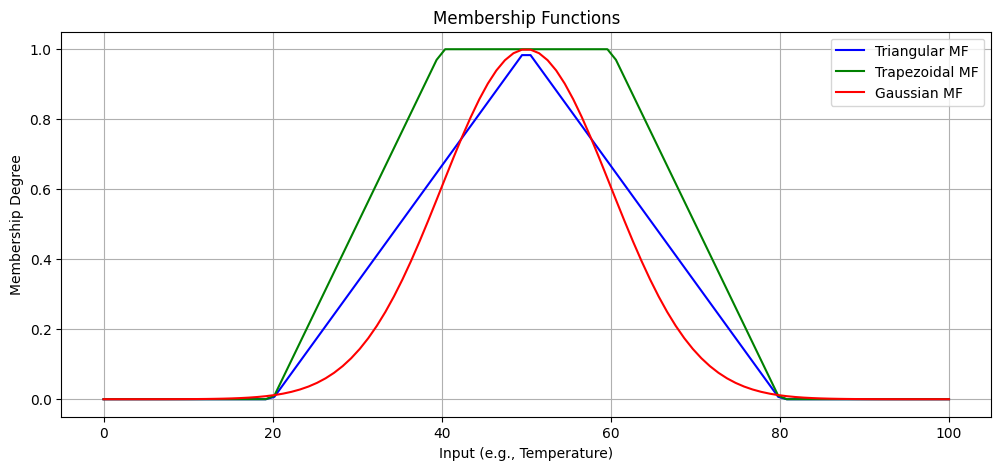

In [13]:
# Plotting Membership Functions
x = np.linspace(0, 100, 100)

plt.figure(figsize=(12, 5))

plt.plot(x, [triangular_mf(i, 20, 50, 80) for i in x], label='Triangular MF', color='blue')
plt.plot(x, [trapezoidal_mf(i, 20, 40, 60, 80) for i in x], label='Trapezoidal MF', color='green')
plt.plot(x, [gaussian_mf(i, 50, 10) for i in x], label='Gaussian MF', color='red')

plt.xlabel('Input (e.g., Temperature)')
plt.ylabel('Membership Degree')
plt.legend()
plt.title('Membership Functions')
plt.grid(True)
plt.show()

Crisp Output using Centroid Method: 50.0


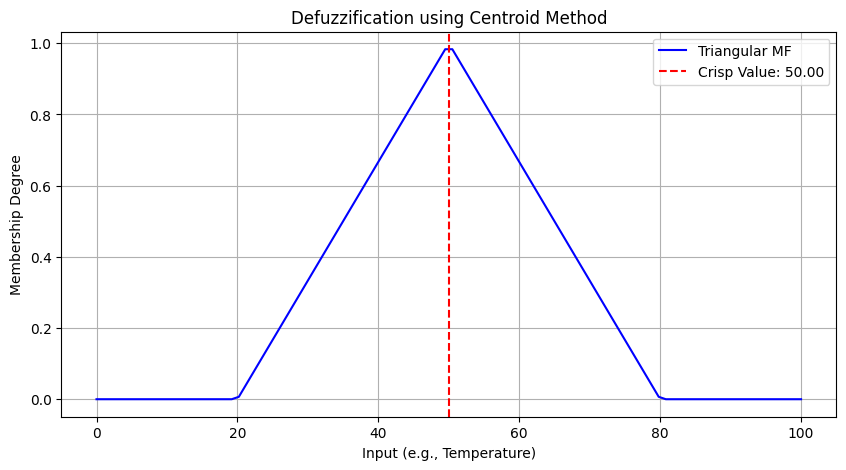

In [14]:
def centroid_defuzzification(x, mf_values):
    numerator = np.sum(x * mf_values)
    denominator = np.sum(mf_values)
    return numerator / denominator if denominator != 0 else 0

# Example: Defuzzifying a triangular membership function
mf_values = np.array([triangular_mf(i, 20, 50, 80) for i in x])
crisp_value = centroid_defuzzification(x, mf_values)

print(f"Crisp Output using Centroid Method: {crisp_value}")

# Plot the Defuzzification Result
plt.figure(figsize=(10, 5))
plt.plot(x, mf_values, label='Triangular MF', color='blue')
plt.axvline(crisp_value, color='red', linestyle='--', label=f'Crisp Value: {crisp_value:.2f}')
plt.xlabel('Input (e.g., Temperature)')
plt.ylabel('Membership Degree')
plt.legend()
plt.title('Defuzzification using Centroid Method')
plt.grid(True)
plt.show()

In [15]:

%%capture
!pip install scikit-fuzzy

In [16]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define the universe of discourse (input and output ranges)
x_temp = np.arange(0, 101, 1)  # Temperature (0 to 100°C)
x_speed = np.arange(0, 101, 1)  # Fan Speed (0 to 100%)

# Define fuzzy membership functions for temperature
temp_cold = fuzz.trimf(x_temp, [0, 0, 50])
temp_warm = fuzz.trimf(x_temp, [30, 50, 70])
temp_hot = fuzz.trimf(x_temp, [50, 100, 100])

# Define fuzzy membership functions for fan speed
speed_low = fuzz.trimf(x_speed, [0, 0, 50])
speed_medium = fuzz.trimf(x_speed, [30, 50, 70])
speed_high = fuzz.trimf(x_speed, [50, 100, 100])

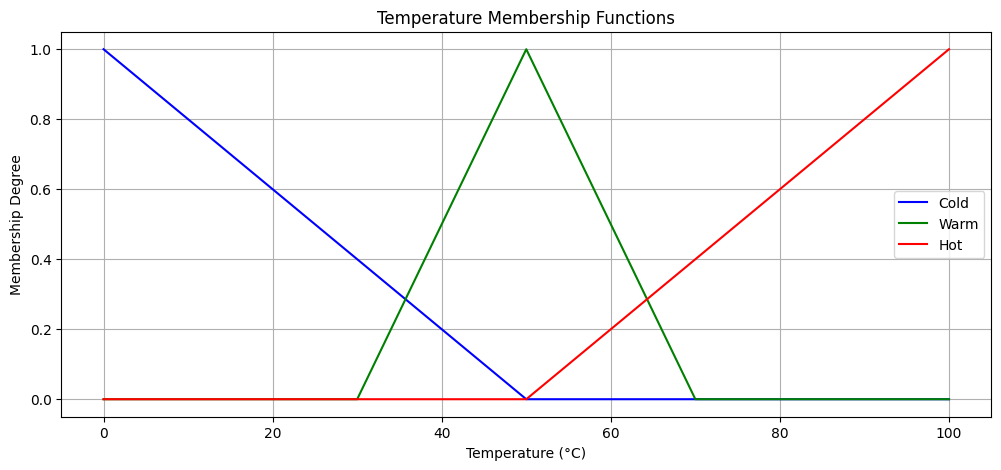

In [17]:
# Plot the membership functions for temperature
plt.figure(figsize=(12, 5))

plt.plot(x_temp, temp_cold, label='Cold', color='blue')
plt.plot(x_temp, temp_warm, label='Warm', color='green')
plt.plot(x_temp, temp_hot, label='Hot', color='red')

plt.title('Temperature Membership Functions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Example input temperature
temp_input = 45

# Fuzzification: Get membership degrees
cold_level = fuzz.interp_membership(x_temp, temp_cold, temp_input)
warm_level = fuzz.interp_membership(x_temp, temp_warm, temp_input)
hot_level = fuzz.interp_membership(x_temp, temp_hot, temp_input)

print(f"Cold: {cold_level}, Warm: {warm_level}, Hot: {hot_level}")

# Apply rules (taking the minimum of input membership degrees)
activation_low = np.fmin(cold_level, speed_low)
activation_medium = np.fmin(warm_level, speed_medium)
activation_high = np.fmin(hot_level, speed_high)

# Combine the outputs using the maximum (aggregation)
aggregated = np.fmax(activation_low, np.fmax(activation_medium, activation_high))

Cold: 0.1, Warm: 0.75, Hot: 0.0


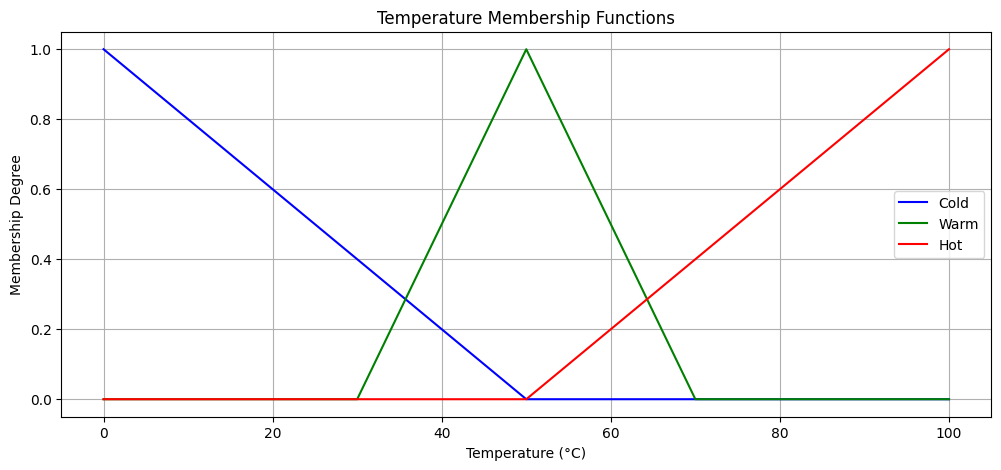

In [19]:
# Plot the membership functions for temperature
plt.figure(figsize=(12, 5))

plt.plot(x_temp, temp_cold, label='Cold', color='blue')
plt.plot(x_temp, temp_warm, label='Warm', color='green')
plt.plot(x_temp, temp_hot, label='Hot', color='red')

plt.title('Temperature Membership Functions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

Crisp Fan Speed: 45.11%


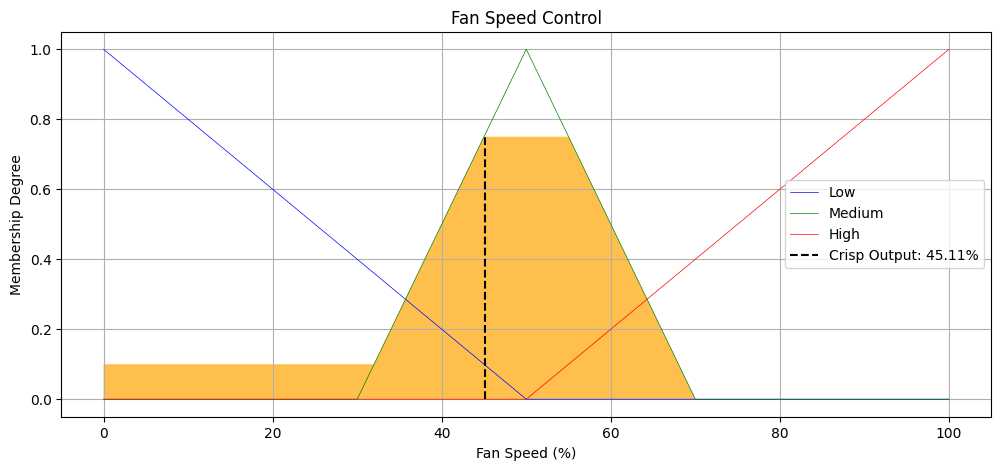

In [20]:
# Defuzzify the aggregated result to get a crisp fan speed
fan_speed = fuzz.defuzz(x_speed, aggregated, 'centroid')
fan_speed_activation = fuzz.interp_membership(x_speed, aggregated, fan_speed)

print(f"Crisp Fan Speed: {fan_speed:.2f}%")

# Plot the aggregated output and the defuzzified result
plt.figure(figsize=(12, 5))

plt.plot(x_speed, speed_low, 'b', linewidth=0.5, label='Low')
plt.plot(x_speed, speed_medium, 'g', linewidth=0.5, label='Medium')
plt.plot(x_speed, speed_high, 'r', linewidth=0.5, label='High')
plt.fill_between(x_speed, 0, aggregated, facecolor='orange', alpha=0.7)
plt.plot([fan_speed, fan_speed], [0, fan_speed_activation], 'k', linestyle='--', label=f'Crisp Output: {fan_speed:.2f}%')

plt.title('Fan Speed Control')
plt.xlabel('Fan Speed (%)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()